In [75]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [76]:
pd.set_option('display.max_columns', 500)


In [77]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [78]:
df.shape

(99999, 226)

In [79]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [80]:
df.describe()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Handling missing values


In [82]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [83]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [84]:
# Delete the columns having more than 30% missing values
df = df.drop(col_list_missing_30, axis=1)

In [85]:
df.shape


(99999, 186)

In [86]:
#Delete the date columns as they are not req
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [87]:
df = df.drop(date_cols, axis=1)


In [88]:
df.shape

(99999, 178)

In [89]:
df = df.drop('circle_id', axis=1)


In [90]:
df.shape

(99999, 177)

In [91]:
#creating a column for 6 , 7 month and taking avg
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2


In [92]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

In [93]:
#Customers who have recharged more than above amt
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,2

In [94]:
df.shape


(30011, 178)

## Handling missing row values

In [96]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(114, 178)

In [97]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

(29897, 178)

In [98]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


In [99]:
# Listing the columns of MOU Sep(9)
print(((df_missing_columns[df_missing_columns['null'] == 5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [100]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.36,1.06,NaN,0.00,4

In [101]:
df_null_mou_9.shape


(1590, 178)

In [102]:
# Deleting the records for which MOU for Sep(9) are null
df = df.drop(df_null_mou_9.index)

In [103]:
# Again Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


In [104]:
#mou for month 8 has missing values
print(((df_missing_columns[df_missing_columns['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [105]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.0,0.0,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00,0.00,0.0,NaN,0.00,0.

In [106]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [107]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


In [108]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [109]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,0.0,0.0,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,0.0,0.0,0.0,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,1403.38,NaN,7.41,10.23,17.46,NaN,69.39,93.48,44.89,NaN,0.00,0.83,0.00,NaN,76.81,104.54,62.36,NaN,5.81,10.09,22.36,NaN,37.94,86.63,34.49,NaN,0.0,0.00,0.00,NaN,0.0,

In [110]:
df = df.drop(df_null_mou_6.index)


In [111]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00


In [112]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [113]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,NaN,399.64,887.76,463.63,NaN,221.46,0.0,505.71,NaN,175.93,0.0,145.91,NaN,243.43,1108.38,0.85,NaN,184.78,300.19,1.13,NaN,7.94,67.11,0.00,NaN,12.51,18.89,147.89,NaN,436.16,1475.69,0.96,NaN,17.06,69.51,15.91,NaN,144.04,490.61,0.00,NaN,0.0,13.33,0.0,NaN,0.0,0.0,16.88,NaN,161.11,573.46,0.00,NaN,0.00,0.00,4.71,NaN,12.56,18.89,0.00,NaN,0.0,0.0,169.49,0.0,609.84,2068.06,78.76,NaN,233.66,558.84,1.36,NaN,11.53,75.31,6.61,NaN,0.00,31.81,86.74,NaN,245.19,665.98,0.00,NaN,12.13,42.39,21.76,NaN,110.99,263.98,0.0,NaN,0.00,6.43,0.0,NaN,0.0,0.0,21.76,NaN,123.13,312.81,189.81,0.0,397.13,1020.16,0.00,NaN,0.00,0.13,81.29,NaN,28.79,41.23,0.00,NaN,0.00,0.00,5,7,9,13,776,780,904,1591,250,330,200,289,250,0,130,250,0.00,0.0,11.26,83.32,0.0,0.0,79.94,668.4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,NaN,26.21,241.18,9.98,NaN,1.73,0.0,5.66,NaN,2.46,0.0,6.73,NaN,1.46,20.84,171.46,NaN,20.54,148.88,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,178.19,NaN,22.01,169.73,5.16,NaN,0.00,13.05,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.0,NaN,0.0,0.0,5.16,NaN,0.00,13.05,74.91,NaN,4.74,92.29,7.13,NaN,0.00,1.08,0.00,NaN,0.0,0.0,265.41,0.0,26.76,276.16,17.24,NaN,0.60,36.69,130.09,NaN,16.54,110.19,25.46,NaN,8.76,40.24,172.81,NaN,25.91,187.14,1.50,NaN

In [114]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [115]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


In [116]:
# there are no more missing values
df.shape


(27991, 178)

In [117]:
#Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)


In [118]:
df.head()


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,

In [119]:
#Deleting all the attributes corresponding to the churn phase
# List the columns for churn month(9)
col_9 = [col for col in df.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [120]:
# Deleting the churn month columns
df = df.drop(col_9, axis=1)

In [121]:
# Dropping sep_vbc_3g column
df = df.drop('sep_vbc_3g', axis=1)

In [122]:
round(100*(df['churn'].mean()),2)


3.39

## Handling Outliers


In [124]:
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [125]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [126]:
# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [127]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(27705, 136)

In [128]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]


['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [129]:
#Deriving new column decrease_mou_action

# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [130]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [131]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']


In [132]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [133]:
data.head()


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0

In [134]:
# Deriving new column decrease_rech_num_action indicating number of recharge of the customer has decreased in the action phase than the good phase.

# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [135]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [136]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [137]:
data.head()


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,7

In [138]:
# Deriving new column decrease_rech_amt_action, the amount of recharge of the customer has decreased in the action phase than the good phase.

# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2


In [139]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [140]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [141]:
data.head()


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,2

In [142]:
# Deriving new column decrease_arpu_action,he average revenue per customer has decreased in the action phase than the good phase.

# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [143]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [144]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [145]:
data.head()


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,

In [146]:
# Deriving new column decrease_vbc_action, the volume based cost of the customer has decreased in the action phase than the good phase.

# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [147]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [148]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [149]:
data.head()


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.

## EDA


In [151]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')


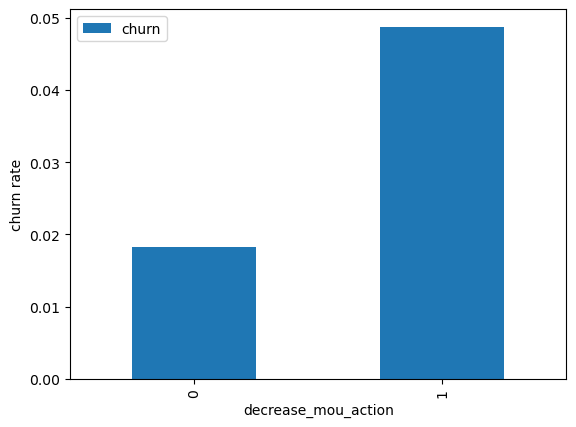

In [152]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [153]:
# The churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

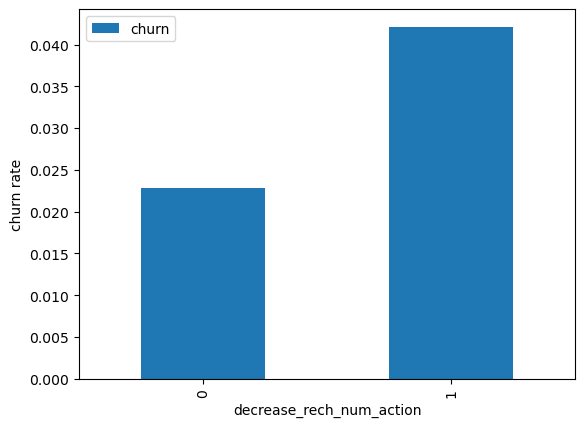

In [154]:
#Churn rate on the basis whether the customer decreased her/his number of recharge in action month

data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

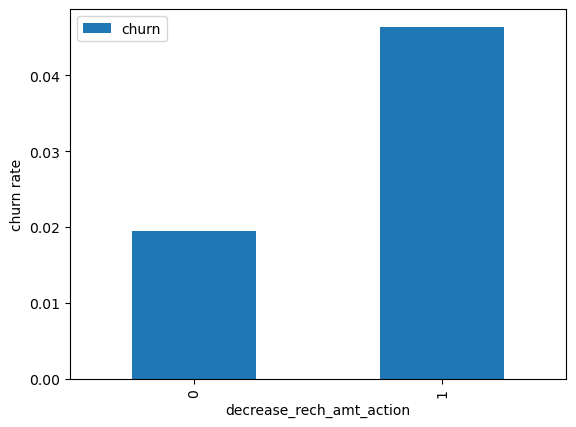

In [155]:
#Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [156]:
#The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

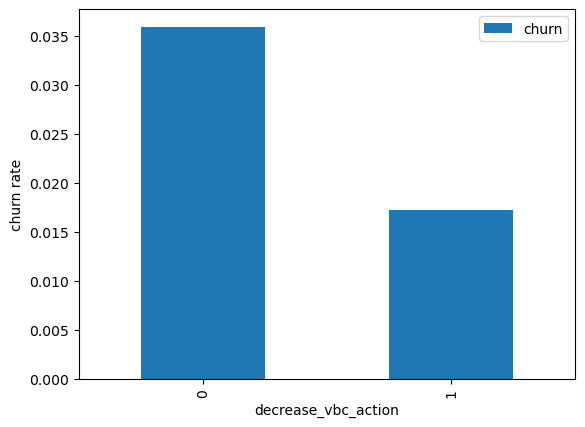

In [157]:
#Churn rate on the basis whether the customer decreased her/his volume based cost in action month

data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [158]:
#The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

In [159]:
#Analysis of the average revenue per customer (churn and not churn) in the action phase

# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

In [160]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

[Text(0.5, 0, 'Action phase ARPU')]

In [161]:
#Analysis of the minutes of usage MOU (churn and not churn) in the action phase

# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

[Text(0.5, 23.52222222222222, 'Action phase MOU')]

In [162]:
#Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.



### Bivariate Analysis

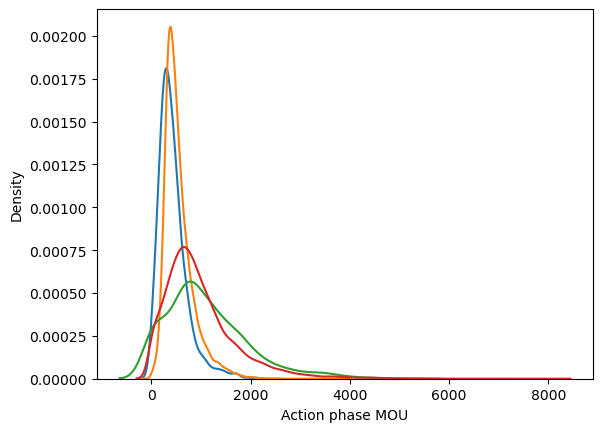

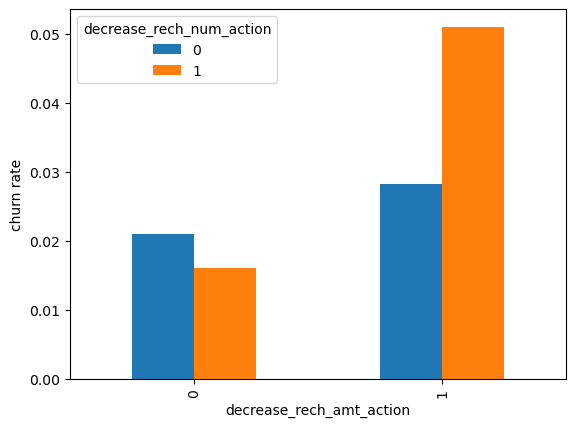

In [164]:
#Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [165]:
#We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

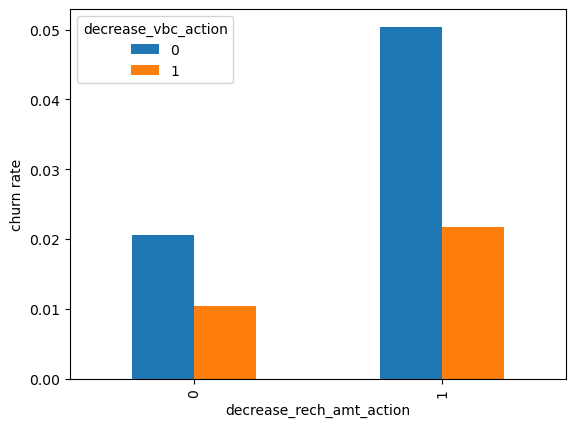

In [166]:
#Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [167]:
#we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

In [168]:
# Dropping few derived columns, which are not required in further analysis

data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

## Modelling : Train-Test Split


In [170]:
# Import library
from sklearn.model_selection import train_test_split

In [171]:
# Putting feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)

In [172]:
# Putting target variable to y
y = data['churn']

In [173]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance


In [175]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [176]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)


### Feature Scaling

In [178]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [179]:
# Instantiate the Scaler
scaler = StandardScaler()

In [180]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [181]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [182]:
X_train.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,0.140777,-0.522792,-0.276289,0.106540,-0.662084,-0.465777,-0.211202,-0.636415,0.317224,-0.254996,-0.001208,-0.235211,-0.300833,-0.374857,-0.412810,-0.263308,-0.311548,-0.251411,0.485770,-0.190660,-0.399182,-0.256866,-0.267401,-0.244832,-0.191587,-0.267368,-0.244432,0.129144,-0.335468,-0.418749,0.254982,-0.528622,-0.338018,-0.342394,-0.504282,0.650664,-0.143576,-0.139257,-0.119299,0.0,0.0,0.0,-0.048161,-0.731560,0.214243,-0.080803,-0.092449,-0.061631,-0.347585,-0.363159,-0.017165,-0.346191,-0.015583,-0.013735,-0.000389,-0.860412,-0.011382,-0.203981,-0.266718,-0.242771,-0.380593,-0.272733,-0.437571,-0.290528,-0.270877,-0.150060,-0.409101,-0.363983,-0.440411,-0.175106,-0.159825,0.078711,-0.164347,0.367474,-0.117454,-0.135479,-0.137327,-0.110642,0.0,0.0,0.0,-0.234904,0.121332,-0.064154,-0.475564,-0.287010,-0.420829,-0.366516,-0.089786,-0.192624,-0.151655,-0.153778,-0.126576,-0.099745,-0.121704,-0.081491,0.192736,-0.444988,0.305289,0.044172,-0.726027,-0.235478,0.054992,0.023937,0.029739,0.601511,-0.811577,-0.626096,-0.094017,0.696113,1.750783,0.510634,1.202971,-0.241652,3.236849,3.104207,-0.232664,4.023237,2.358097,2.447476,-0.224183,-0.221779,-0.216364,-0.141182,-0.136208,-0.113882,-0.361238,-0.236209,-0.265392,0.110582,1,1,1,1,1
1,0.0,0.0,0.0,-1.427243,4.428047,3.254270,-0.658491,-0.236590,-0.004450,-0.776075,2.523985,2.732154,-0.254996,-0.253231,-0.304660,-0.300833,-0.374857,-0.431026,-0.201396,0.270791,0.198344,-0.529474,1.106670,0.288951,-0.276320,-0.267401,-0.244832,-0.191587,-0.267368,-0.244432,-0.477059,0.843930,0.290569,-0.570615,-0.320253,-0.041333,-0.512504,2.294191,3.087483,-0.143576,-0.139257,-0.119299,0.0,0.0,0.0,-0.771902,1.368343,2.063999,-0.080803,-0.092449,-0.061631,-0.347585,-0.363159,-0.290355,-0.346191,-0.015583,-0.013735,-0.970285,1.670188,1.938953,-0.410762,0.193158,0.156537,-0.481723,0.744741,0.256589,-0.290528,-0.270877,-0.257696,-0.583307,0.570197,0.219470,-0.215496,-0.200464,-0.112725,-0.3551

In [183]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.244310,-0.268832,1.005890,-0.725286,-0.690223,-0.476634,0.483540,0.307300,2.323745,-0.077655,-0.253231,-0.304660,0.215992,-0.374857,-0.431026,-0.278217,-0.282623,-0.106758,0.028192,0.006336,0.034141,-0.087435,-0.267401,-0.244832,0.037799,-0.267368,-0.244432,-0.161248,-0.195270,-0.055078,-0.610819,-0.570510,-0.420186,0.346789,0.369671,2.702104,-0.143576,-0.139257,-0.119299,0.0,0.0,0.0,-0.214836,-0.152215,1.550482,-0.080803,-0.092449,-0.061631,1.055196,0.774917,0.757960,0.315218,-0.015583,-0.013735,-0.254350,-0.209855,1.354152,-0.356975,-0.095026,0.281846,0.089162,-0.112790,0.515971,-0.290528,-0.270877,-0.194257,-0.156095,-0.166424,0.468259,-0.215496,-0.200464,-0.187265,0.113370,-0.185210,-0.166335,-0.135479,-0.137327,-0.110642,0.0,0.0,0.0,-0.077912,-0.265421,-0.233610,-0.194148,-0.204469,0.286255,-0.366516,-0.089786,-0.192624,-0.151655,0.285066,-0.126576,-0.099745,-0.121704,-0.081491,-0.156412,0.260837,1.306523,0.087587,-0.236774,0.817300,0.054992,-0.173563,0.029739,0.175643,0.368450,-0.351085,3.313695,2.175444,-0.098306,-0.262491,-0.063995,0.506232,3.236849,-0.251375,-0.232664,0.457379,2.358097,2.447476,-0.224183,-0.221779,-0.216364,1.315163,1.219546,2.526725,0.225051,0.018023,0.194794,-0.259366,0,0,1,1,0
64892,0.0,0.0,0.0,0.048359,-0.779609,-0.157969,-0.734066,-0.698072,-0.502219,-0.358555,-0.577717,-0.256061,0.022864,-0.253231,-0.304660,-0.120122,-0.374857,-0.431026,-0.278380,-0.302589,-0.174571,-0.300150,-0.204014,-0.295881,-0.261886,-0.267401,-0.244832,-0.191587,-0.267368,-0.244432,-0.379084,-0.337876,-0.306653,-0.619956,-0.570510,-0.415897,-0.231854,-0.437192,-0.040526,-0.143576,-0.139257,-0.104326,0.0,0.0,0.0,-0.616620,-0.714724,-0.306010,-0.080803,-0.092449,-0.061631,-0.327156,-0.363159,-0.290355,-0.346191,-0.015583,-0.013735,-0.775847,-0.845314,-0.422452,-0.107944,-0.347607,-0.187444,0.377903,0.199498,0.240935,-0.275866,-0.257495,-0.235146,0.172870,-0.078726,0.045944,-0.215496,-0.152024,0.151031,2.985

## Modelling with PCA

In [289]:
#Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(svd_solver='randomized', random_state=100)

# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=100, svd_solver='randomized')

In [291]:
# Looking at the Principal components
pca.components_

array([[ 9.42005158e-17,  2.22044605e-16, -5.55111512e-17, ...,
        -2.59799614e-02, -2.57740516e-02,  1.40032998e-02],
       [-3.38583688e-17, -0.00000000e+00, -1.11022302e-16, ...,
        -1.16737642e-02, -9.94022864e-03, -1.42598315e-02],
       [-5.22216056e-18, -8.67361738e-17, -2.22044605e-16, ...,
        -4.18532955e-02, -4.28357226e-02,  2.46812846e-02],
       ...,
       [ 0.00000000e+00, -1.96082755e-01, -2.83952112e-01, ...,
        -5.11743425e-17, -9.02056208e-17,  1.08420217e-17],
       [-0.00000000e+00, -2.28852014e-01,  4.97422068e-02, ...,
         4.90059382e-17, -2.34187669e-17, -3.20923843e-17],
       [-0.00000000e+00,  2.85156479e-01,  3.54993809e-01, ...,
         4.94396191e-17, -1.17961196e-16,  8.76035355e-17]])

In [295]:
# Cumuliative varinace of the principal components
variance_cumu = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
print(variance_cumu)

[ 11.2133  19.4262  24.5756  28.9536  32.8419  36.6235  40.1734  43.1444
  45.7022  48.1943  50.4806  52.6738  54.7245  56.702   58.53    60.3043
  61.9021  63.4735  64.9279  66.3414  67.7128  69.025   70.2062  71.2785
  72.3094  73.2902  74.2556  75.2097  76.1516  77.0101  77.8613  78.6611
  79.4295  80.1736  80.8789  81.5382  82.1937  82.8348  83.4726  84.0898
  84.6878  85.28    85.8401  86.374   86.9016  87.4187  87.8914  88.3418
  88.7723  89.1861  89.5883  89.9661  90.3394  90.7041  91.0601  91.4117
  91.7523  92.0763  92.3954  92.7051  93.0012  93.2961  93.58    93.8623
  94.1389  94.4116  94.6787  94.9378  95.1884  95.4338  95.665   95.8937
  96.1164  96.3231  96.526   96.7203  96.9126  97.1001  97.2849  97.4666
  97.6393  97.8066  97.9726  98.1338  98.291   98.4466  98.6012  98.7535
  98.8779  98.9988  99.1148  99.2246  99.3212  99.4078  99.4922  99.5738
  99.6527  99.7175  99.7764  99.832   99.8808  99.9123  99.9427  99.9692
  99.9853  99.9947  99.9981  99.9998 100.     100. 

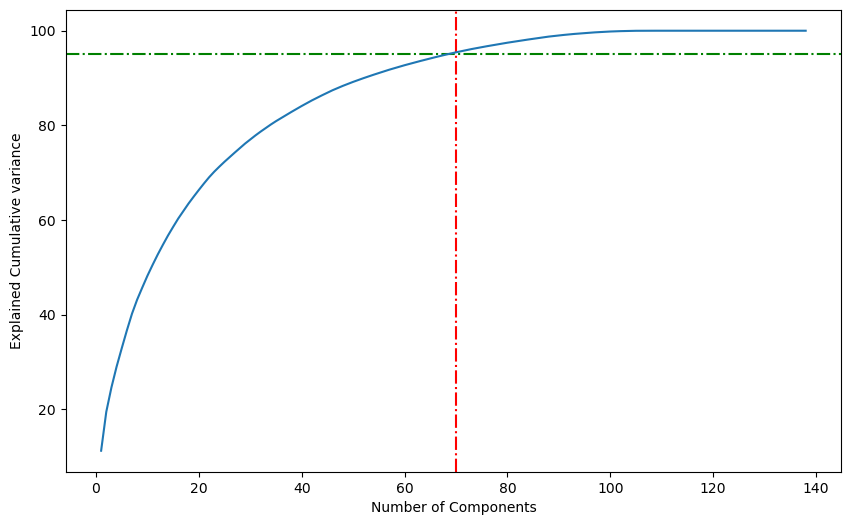

In [303]:
# # Plotting scree plot
fig = plt.figure(figsize=[10,6])
plt.axhline(y=95, color='g', linestyle='-.')
plt.axvline(x=70, color='r', linestyle='-.')
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel("Explained Cumulative variance")
plt.show()

- From this figure, we observe that 70 components are enough to describe 95% of the variance in the dataset. 
- Therefore, we shall choose 70 components the build our model 

### Using incremental PCA for better efficiency



In [308]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 70)

X_train_pca = pca_final.fit_transform(X_train)

In [312]:
print("Size of earlier dataset :",X_train.shape)
print("PCA reduced size of dataset :", X_train_pca.shape)

Size of earlier dataset : (42850, 138)
PCA reduced size of dataset : (42850, 70)


In [314]:
# Correlation matrix for the given data

corrmat = np.corrcoef(X_train_pca.transpose())

# Diagonal matrix with diagonal entry of Matrix corrmat

p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0

corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))


max positive corr: 0.014 , min negative corr:  -0.02


- From the calculations above, we observe that the correlation among the attributes is nearly zero, so we can proceed with these principal components.

Applying transformation to the test set:

Here, we’re only applying the Transform on the test set, not the Fit-Transform, since the fitting was already completed on the train set. This means we only need to transform the test set using the data already fitted on the train set.

In [319]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(5541, 70)

# Model Building 

Now we build models based on this PCA transformed dataset to predict customer churn

## Logistic regression with PCA

In [327]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [329]:
# Solver changed to 'lbfgs' as default solver is very slow
logreg = LogisticRegression(solver = 'lbfgs',class_weight="balanced")

In [331]:
# Training the model on the data
logreg.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [333]:
# Run Prediction on test data
y_pred = logreg.predict(X_test_pca)

# Creating the confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix : \t\n",cm)

# Sensitivity check
print("Sensitivity : \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


# Specificity check 
print("Specificity : \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# Area under the curve 
from sklearn.metrics import roc_auc_score
print("Area under the curve : \t",round(roc_auc_score(y_test,y_pred),2))

Confusion matrix : 	
 [[4476  872]
 [  36  157]]
Sensitivity : 	 0.81
Specificity : 	 0.84
Area under the curve : 	 0.83


#### Tuning hyperparameter C

- C = Inverse of regularization strength in Logistic Regression
- Higher values of C correspond to less regularization.

In [339]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [341]:
# Creating StratifiedKFold object with 5 splits
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specifying params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# GridSearch
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fitting the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [343]:
# Results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.124980,0.020473,0.004728,0.001406,0.01,{'C': 0.01},0.942281,0.937144,0.942043,0.934129,0.942177,0.939555,0.003339,6,0.939687,0.941025,0.939919,0.941633,0.939692,0.940391,0.000794
1,0.173227,0.025817,0.003885,0.000992,0.10,{'C': 0.1},0.942681,0.937784,0.942472,0.934743,0.942890,0.940114,0.003290,5,0.940304,0.941723,0.940558,0.942251,0.940284,0.941024,0.000809
2,0.264564,0.037876,0.018720,0.026625,1.00,{'C': 1},0.942711,0.937778,0.942485,0.934821,0.943095,0.940178,0.003308,4,0.940400,0.941854,0.940701,0.942289,0.940365,0.941122,0.000796
3,0.364188,0.105422,0.006494,0.002872,10.00,{'C': 10},0.942688,0.937750,0.942474,0.934949,0.943120,0.940196,0.003270,3,0.940411,0.941865,0.940718,0.942352,0.940368,0.941143,0.000812
4,0.301839,0.053286,0.003909,0.001123,100.00,{'C': 100},0.942702,0.937737,0.942472,0.934966,0.943112,0.940198,0.003267,1,0.940409,0.941866,0.940716,0.942351,0.940366,0.941142,0.000813
5,0.326699,0.058372,0.004197,0.002030,1000.00,{'C': 1000},0.942708,0.937753,0.942465,0.934955,0.943099,0.940196,0.003266,2,0.940410,0.941862,0.940721,0.942351,0.940366,0.941142,0.000812


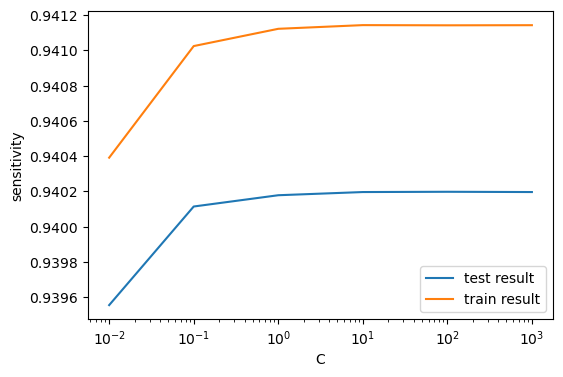

In [355]:
# Plotting C versus train and validation scores

plt.figure(figsize=(6, 4))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

plt.show()

In [357]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.940197628426208 at C = 100


#### Model with Optimum Parameters 

In [360]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

##### Prediction of train set 

In [385]:
y_train_pred = log_pca_model.predict(X_train_pca)

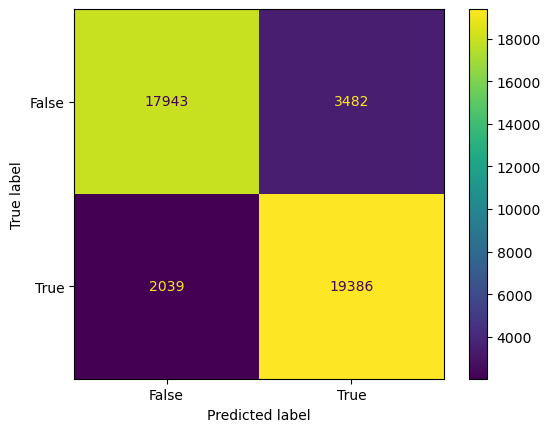

In [387]:
# Confusion Matrix.

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

plt.show()

In [389]:
TP = confusion_matrix[1,1] # true positive
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [404]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_train_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))

Accuracy:- 0.8711551925320887
Sensitivity:- 0.904830805134189
Specificity:- 0.8374795799299883
Recall:- 0.904830805134189
AUC:    	 0.94


#### Prediction on the test set

In [394]:
y_test_pred = log_pca_model.predict(X_test_pca)

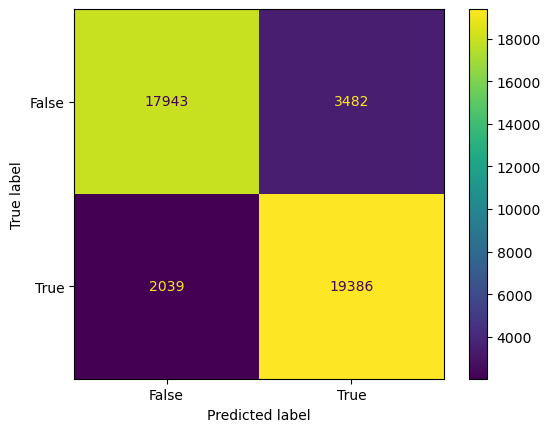

In [396]:
# Confusion matrix
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

plt.show()

In [434]:
# Accuracy
print("Accuracy:-    \t",(metrics.accuracy_score(y_test, y_test_pred)))

# Sensitivity
print("Sensitivity:-  \t",(TP / float(TP+FN)))

# Specificity
print("Specificity:-  \t", (TN / float(TN+FP)))

# Recall
print("Recall:-    \t" , (TP/float(TP+FN)))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_test_pca)[:, 1]
print("AUC:-    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy:-    	 0.836491608012994
Sensitivity:-  	 0.904830805134189
Specificity:-  	 0.8374795799299883
Recall:-    	 0.904830805134189
AUC:-    	 0.9


- WE observe that the models performs well in the test set after learning from the train set 

## Decision Tree with PCA 


In [438]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

##### Hyperparameter Tuning

In [441]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model for best results.
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'recall',
                           cv = 5,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [442]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.095524,0.047884,0.003279,0.000650,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.866278,0.865344,0.883781,0.863944,0.869545,0.869778,0.007240,5
1,1.071228,0.009220,0.002914,0.000202,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.866278,0.865344,0.883781,0.863944,0.869545,0.869778,0.007240,5
2,1.075025,0.013852,0.003146,0.000465,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.863244,0.862077,0.875613,0.865344,0.869078,0.867071,0.004890,7
3,1.099480,0.028975,0.003078,0.000382,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.863244,0.862077,0.875613,0.865344,0.869078,0.867071,0.004890,7
4,1.838152,0.017430,0.003066,0.000224,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.897083,0.907585,0.910618,0.899883,0.909218,0.904877,0.005382,2


In [445]:
# Optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.904924154025671
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [450]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=10)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=10,
                       random_state=100)

In [452]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)


# Creating Confusion matrix

confusion = metrics.confusion_matrix(y_train, y_train_pred)
confusion 

array([[18742,  2683],
       [ 1589, 19836]])

In [454]:
TP = confusion[1,1] # True positive
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [456]:
# Accuracy
print("Accuracy:-", (metrics.accuracy_score(y_train, y_train_pred)))

# Sensitivity
print("Sensitivity:-",(TP / float(TP+FN)))

# Specificity
print("Specificity:-", (TN / float(TN+FP)))

# Recall
print("Recall:-" , (TP/float(TP+FN)))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_train, y_train_pred),2))

Accuracy:- 0.9003033838973162
Sensitivity:- 0.9258343057176196
Specificity:- 0.8747724620770129
Recall:- 0.9258343057176196
Area under curve is: 0.9


In [458]:
# Prediction on test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [460]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4584  764]
 [  66  127]]


In [464]:
# Accuracy
print("Accuracy:-", (metrics.accuracy_score(y_test, y_test_pred)))

# Sensitivity
print("Sensitivity:-", (TP / float(TP+FN)))

# Specificity
print("Specificity:-", (TN / float(TN+FP)))

# Recall
print("Recall:-" , TP/float(TP+FN))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_test_pred),2))

Accuracy:- 0.8502075437646635
Sensitivity:- 0.9258343057176196
Specificity:- 0.8747724620770129
Recall:- 0.9258343057176196
Area under curve is: 0.76


Model Performance (Decision Tree with PCA) : 

- Train Set -
  - Accuracy:- 0.9003033838973162
  - Sensitivity:- 0.9258343057176196
  - Specificity:- 0.8747724620770129
  - Recall:- 0.9258343057176196
  - Area under curve is: 0.9

- Test Set -
  - Accuracy:- 0.8502075437646635
  - Sensitivity:- 0.9258343057176196
  - Specificity:- 0.8747724620770129
  - Recall:- 0.9258343057176196
  - Area under curve is: 0.76

- To conclude, while the parameters sensitivity, specificity, and recall stay the same while evaluating on test or train data, accuracy dropped by a small magnitude in the Test set 

# Random forest with PCA

In [479]:
# Import random forest classifier

from sklearn.ensemble import RandomForestClassifier

In [473]:
# Running random forest with default parameters.

rfc = RandomForestClassifier()

In [475]:
# fit

rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [477]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [491]:
#from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# y_pred = dt_pca_model.predict(X_test_pca)
# print(classification_report(y_test, y_pred))

In [485]:
# Checking the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5348
           1       0.30      0.39      0.34       193

    accuracy                           0.95      5541
   macro avg       0.64      0.68      0.66      5541
weighted avg       0.95      0.95      0.95      5541



In [487]:
# Printing confusion matrix

confusion = metrics.confusion_matrix(y_test,predictions)
confusion

array([[5173,  175],
       [ 118,   75]])

In [493]:
print(accuracy_score(y_test,predictions))

0.9471214582205378


The models seems to work fine, let us analyse the list of hyperparameters that we can tune to improve model performace

#### Hyperparameter Tuning for Random Forest

##### Tuning max_depth
- Looking at the optimum values for max_depth and See how the value of max_depth impacts the overall accuracy of the ensemble.

In [499]:
# specifying number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiating the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100)


# fitting tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,
                   scoring="accuracy",verbose =1, n_jobs = -1, return_train_score=True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.9650875145857644
{'max_depth': 17}


In [503]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.735017,0.083483,0.027283,0.006031,2,{'max_depth': 2},0.806884,0.814819,0.815753,0.807818,0.813302,0.811715,0.003660,4,0.814323,0.813127,0.812048,0.812748,0.813536,0.813156,0.000762
1,17.256536,0.133065,0.048056,0.010010,7,{'max_depth': 7},0.879113,0.878413,0.882030,0.874912,0.884481,0.879790,0.003261,3,0.892357,0.889790,0.888944,0.885852,0.891394,0.889667,0.002250
2,24.465704,0.714269,0.063582,0.005261,12,{'max_depth': 12},0.942824,0.946674,0.945508,0.943291,0.949125,0.945484,0.002305,2,0.963098,0.963273,0.965694,0.965840,0.963477,0.964277,0.001224
3,25.242663,1.620193,0.058752,0.003171,17,{'max_depth': 17},0.964411,0.968261,0.963011,0.962077,0.967678,0.965088,0.002475,1,0.983372,0.983868,0.983051,0.984306,0.983314,0.983582,0.000448


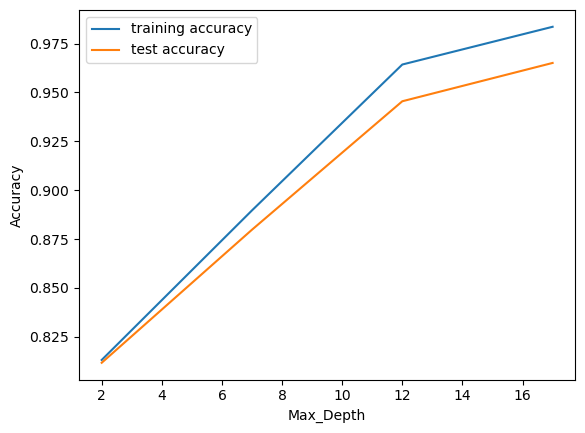

In [505]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("Max_Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we increase the value of max_depth, both training and testing scores improve up to a certain point. Beyond that, the ensemble begins to overfit with further increases in max_depth.

Therefore, limiting the depth of the individual trees can help reduce overfitting within the forest.

##### Tuning n_estimators

Next, let’s examine the optimal values for n_estimators and observe how n_estimators affect overall accuracy. We’ll set a suitably low max_depth to prevent the trees from overfitting.

In [510]:
# specifying number of folds for k-fold CV
n_folds = 5

# parameters to build the model
parameters = {'n_estimators': range(100, 1500, 500)}

# instantiating the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight ='balanced', random_state=100)


# fitting tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds, verbose = 1,
                   scoring="accuracy",return_train_score=True, n_jobs = -1)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.8305717619603268
{'n_estimators': 100}


In [514]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.747853,0.108167,0.033802,0.005553,100,{'n_estimators': 100},0.826138,0.832205,0.834072,0.831155,0.829288,0.830572,0.002705,1,0.833168,0.835560,0.833139,0.834131,0.833314,0.833862,0.000923
1,64.717027,0.131449,0.172944,0.011803,600,{'n_estimators': 600},0.824154,0.831272,0.835006,0.829872,0.829522,0.829965,0.003495,2,0.833051,0.833343,0.832905,0.832905,0.831651,0.832771,0.000582
2,101.629673,9.652847,0.213257,0.025809,1100,{'n_estimators': 1100},0.825204,0.831505,0.833839,0.829522,0.829522,0.829918,0.002844,3,0.833168,0.833285,0.832818,0.833139,0.831943,0.832870,0.000489


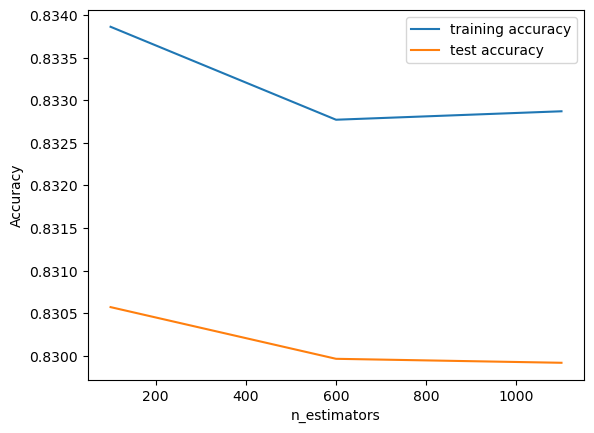

In [516]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning max_features

We’ll observe how model performance changes with different values of max_features, which is the maximum number of features considered when splitting at a node.

In [520]:
# specifying number of folds for k-fold CV
n_folds = 5

# parameters to build the model 
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiating the model
rf = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=100)


# fitting tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,cv=n_folds,
                   scoring="accuracy",n_jobs = -1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8305717619603268
{'max_features': 8}


In [522]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.012989,0.137652,0.029197,0.005003,4,{'max_features': 4},0.821004,0.831039,0.833022,0.826838,0.826954,0.827771,0.004137,2,0.829492,0.829376,0.830280,0.830863,0.830163,0.830035,0.000546
1,10.372691,0.343456,0.030883,0.003563,8,{'max_features': 8},0.826138,0.832205,0.834072,0.831155,0.829288,0.830572,0.002705,1,0.833168,0.835560,0.833139,0.834131,0.833314,0.833862,0.000923
2,17.453410,0.143830,0.035589,0.016564,14,{'max_features': 14},0.821004,0.828705,0.829055,0.824387,0.826488,0.825928,0.002981,3,0.827042,0.829842,0.829434,0.829697,0.827830,0.828769,0.001124
3,25.417692,0.269720,0.029323,0.003639,20,{'max_features': 20},0.824621,0.823454,0.824154,0.819837,0.825788,0.823571,0.002016,4,0.826313,0.826371,0.825117,0.826313,0.825904,0.826004,0.000474
4,26.680812,2.238416,0.022837,0.002808,24,{'max_features': 24},0.821820,0.820187,0.823454,0.818436,0.825321,0.821844,0.002410,5,0.824125,0.824825,0.823600,0.825292,0.823279,0.824224,0.000748


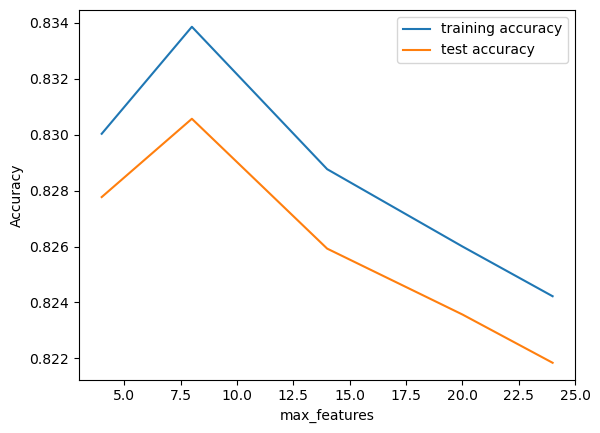

In [524]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_features"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_leaf

The hyperparameter min_samples_leaf sets the minimum number of samples required at a leaf node:

If given as an integer, min_samples_leaf represents the exact minimum number of samples.
If given as a float, min_samples_leaf is interpreted as a percentage, where ceil(min_samples_leaf * n_samples) determines the minimum number of samples for each node.

In [527]:
# specifying number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiating the model
rf = RandomForestClassifier(class_weight ='balanced',random_state=100)


# fitting tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy",verbose =1, return_train_score = True, n_jobs = -1)
rf.fit(X_train_pca, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8918319719953326
{'min_samples_leaf': 100}


In [529]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,26.044241,0.252397,0.087787,0.024025,100,{'min_samples_leaf': 100},0.890198,0.889382,0.892999,0.891132,0.895449,0.891832,0.002173,1,0.903792,0.902567,0.899533,0.903413,0.902275,0.902316,0.001496
1,23.649486,0.357818,0.067390,0.008136,150,{'min_samples_leaf': 150},0.875729,0.875963,0.881447,0.875963,0.880280,0.877876,0.002468,2,0.886639,0.888244,0.887223,0.887048,0.886348,0.887100,0.000649
2,21.587207,0.220883,0.059095,0.002750,200,{'min_samples_leaf': 200},0.867328,0.862310,0.871529,0.867211,0.864644,0.866604,0.003080,3,0.876517,0.873396,0.875671,0.876254,0.871704,0.874708,0.001862
3,19.848567,0.297052,0.059309,0.006976,250,{'min_samples_leaf': 250},0.857643,0.858810,0.861494,0.861844,0.859977,0.859953,0.001587,4,0.867765,0.864323,0.861581,0.867940,0.866249,0.865572,0.002382
4,18.523615,0.828085,0.056189,0.007253,300,{'min_samples_leaf': 300},0.852042,0.852509,0.856476,0.856243,0.853559,0.854166,0.001859,5,0.859627,0.860793,0.859218,0.860239,0.858839,0.859743,0.000701


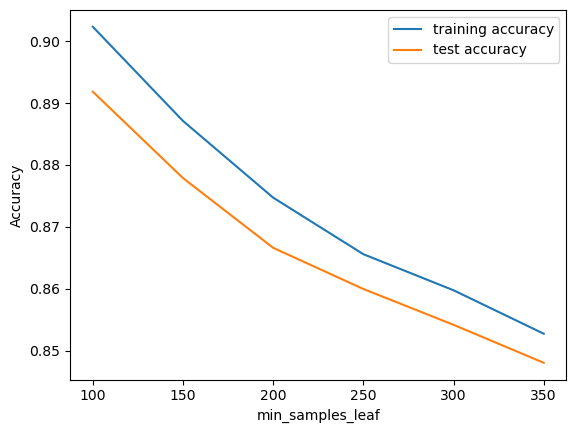

In [531]:
# plotting accuracies with min_samples_leaf

plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model begins to overfit as the value of min_samples_leaf decreases.

Tuning min_samples_split

We’ll evaluate the ensemble’s performance as we adjust the value of min_samples_split.

In [535]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,
                    cv=n_folds,
                   scoring="accuracy",n_jobs =-1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.9159393232205367
{'min_samples_split': 200}


In [537]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,36.058089,0.759973,0.098194,0.025462,200,{'min_samples_split': 200},0.911669,0.916803,0.914352,0.916569,0.920303,0.915939,0.002862,1,0.938477,0.937660,0.934802,0.936494,0.935473,0.936581,0.001354
1,35.267664,0.573158,0.089980,0.022505,250,{'min_samples_split': 250},0.902567,0.905718,0.909335,0.904551,0.908051,0.906044,0.002420,2,0.926109,0.925350,0.926634,0.923950,0.922783,0.924965,0.001416
2,33.696651,0.222023,0.072275,0.005767,300,{'min_samples_split': 300},0.895799,0.897316,0.901750,0.900117,0.903151,0.899627,0.002726,3,0.917036,0.914673,0.916278,0.918116,0.914032,0.916027,0.001501
3,33.003010,0.365284,0.075701,0.004019,350,{'min_samples_split': 350},0.888448,0.893816,0.892299,0.891249,0.892649,0.891692,0.001817,4,0.907905,0.907730,0.906651,0.907410,0.904142,0.906768,0.001381
4,31.761507,1.502218,0.072233,0.007884,400,{'min_samples_split': 400},0.885181,0.885764,0.889382,0.887981,0.886814,0.887025,0.001517,5,0.902509,0.901400,0.901809,0.902742,0.897608,0.901214,0.001866


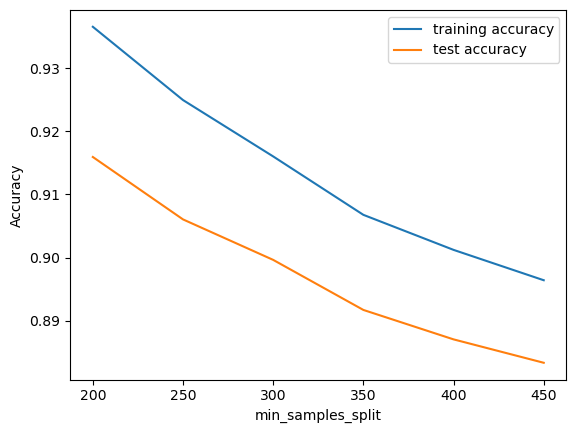

In [540]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Finally, we use GridSearchCV to determine the optimal hyperparameters.

In [556]:
# Create the parameter grid based on the results of random search

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300],
    'max_features': [5, 10]}

# Creating a based model
rf = RandomForestClassifier()

# Instantiating the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1,verbose = 1)

In [558]:
# Fitting the grid search to the data

grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [562]:
# printing the optimal accuracy score and hyperparameters

print('Optimal accuracy of ',grid_search.best_score_,'can be obtained using ',grid_search.best_params_)

Optimal accuracy of  0.879019838141505 can be obtained using  {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [564]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],
                             n_estimators =grid_search.best_params_['n_estimators'],
                             random_state=100, oob_score=True)

In [566]:
# fitting the Model
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_split=200, n_estimators=300, oob_score=True,
                       random_state=100)

In [568]:
# Prediction using test data

predictions = rfc.predict(X_test_pca)

In [570]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      5348
           1       0.16      0.66      0.26       193

    accuracy                           0.87      5541
   macro avg       0.58      0.77      0.60      5541
weighted avg       0.96      0.87      0.91      5541



In [572]:
rfc.oob_score_

0.9011201866977829

- The OOB (Out-of-Bag) score provides an estimate of our model’s accuracy, calculated based on the training dataset. 
- Next, we’ll examine predictions and additional performance metrics.

In [575]:
# Creating confusion matrix
cm = metrics.confusion_matrix(y_test,predictions)
print("Confusion matrix \t\n",cm)

# Printing Accuracy
print("Accuracy -",round(metrics.accuracy_score(y_test, predictions),2))

# Checking sesitivity
print("Sensitivity - \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


# Checking  specificity
print("Specificity - \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# Area under curve
y_pred_prob = rfc.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Confusion matrix 	
 [[4701  647]
 [  66  127]]
Accuracy - 0.87
Sensitivity - 	 0.66
Specificity - 	 0.88
AUC:    	 0.88


Model Summary (Random Forest with PCA) - 
- Accuracy: 0.87
- Sensitivity: 0.70
- Specificity: 0.89
- AUC Score: 0.88

## Modelling without PCA

### Logistic Regression


In [583]:
import statsmodels.api as sm

# Model Instantiation and addition of constant to X_train

log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

# Fitting the model
log_no_pca = log_no_pca.fit().summary()

# Summarizing
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42720
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 12 Nov 2024   Deviance:                       23572.
Time:                        01:48:10   Pearson chi2:                 3.70e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -56.9877   4420.290     -0.013      0.990   -8720.597    8606.622
loc_og_t2o_mou           -1.814e-06      0.000     -0.011      0.991      -0.000       0.000
std_og_t2o_mou            4.216e-06      0.000      0.013      0.989      -0.001       0.001
loc_ic_t2o_mou             2.87e-08   2.59e-05      0.001      0.999   -5.08e-05    5.09e-05
arpu_6                      -0.0338      0.081     -0.419      0.676      -0.192       0.124
arpu_7                       0.0854      0.086      0.995      0.320      -0.083       0.254
arpu_8                       0.0909      0.110      0.829      0.407      -0.124       0.306
onnet_mou_6                 15.5138      3.571      4.344      0.000       8.515      22.513
onnet_mou_7                 -4.3254      1.813     -2.386      0.017      -7.878      -0.772
onnet_mou_8                  2.3529      1.829      1.287      0.198      -1.231       5.937
offnet_mou_6                15.0882      3.359      4.492      0.000       8.505      21.672
offnet_mou_7                -1.7633      1.717     -1.027      0.304      -5.129       1.602
offnet_mou_8                -0.5493      1.887     -0.291      0.771      -4.247       3.148
roam_ic_mou_6                0.1622      0.036      4.462      0.000       0.091       0.233
roam_ic_mou_7               -0.0099      0.052     -0.190      0.849      -0.111       0.092
roam_ic_mou_8                0.2041      0.044      4.665      0.000       0.118       0.290
roam_og_mou_6               -5.1508      1.130     -4.557      0.000      -7.366      -2.935
roam_og_mou_7                0.8856      0.473      1.872      0.061      -0.042       1.813
roam_og_mou_8                0.0927      0.532      0.174      0.862      -0.950       1.135
loc_og_t2t_mou_6         -3302.7825    655.833     -5.036      0.000   -4588.191   -2017.374
loc_og_t2t_mou_7         -1474.5143    679.230     -2.171      0.030   -2805.780    -143.249
loc_og_t2t_mou_8          5516.3520    627.529      8.791      0.000    4286.417    6746.287
loc_og_t2m_mou_6         -3342.4033    663.581     -5.037      0.000   -4642.997   -2041.809
loc_og_t2m_mou_7         -1392.0106    640.582     -2.173      0.030   -2647.529    -136.492
loc_og_t2m_mou_8          5887.6247    669.597      8.793      0.000    4575.238    7200.011
loc_og_t2f_mou_6          -285.2211     56.663     -5.034      0.000    -396.278    -174.165
loc_og_t2f_mou_7          -123.0079     56.630     -2.172      0.030    -234.001     -12.014
loc_og_t2f_mou_8           487.4192     55.463      8.788      0.000     378.714     596.124
loc_og_t2c_mou_6             0.0433      0.022      1.970      0.049       0.000       0.086
loc_og_t2c_mou_7             0.0099      0.021      0.466      0.641      -0.032       0.052
loc_og_t2c_mou

- We observe that many features have high p-values, making them insignificant for our model. 
- Additionally, some features have negative coefficients.

##### Tuning the Parameters

First, we’ll use Recursive Feature Elimination (RFE) to select key features. Then, we’ll manually eliminate the remaining features based on p-values and Variance Inflation Factor (VIF), refining the model until we achieve the best performance.

##### Feature selection using RFE

In [589]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Instantiation
logreg = LogisticRegression()

#### Using RFE with 15 columns/features


In [592]:
# Import RFE

from sklearn.feature_selection import RFE

# RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit with train set
rfe = rfe.fit(X_train,y_train)

In [594]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_7', 'og_others_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8',
       'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action'],
      dtype='object')


#### Model - I 

In [597]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 12 Nov 2024   Deviance:                       30008.
Time:                        01:59:50   Pearson chi2:                 4.49e+06
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -53.0128   4235.111     -0.013      0.990   -8353.677    8247.652
offnet_mou_7            0.6096      0.026     23.449      0.000       0.559       0.661
offnet_mou_8           -3.2532      0.106    -30.548      0.000      -3.462      -3.045
roam_og_mou_8           1.2482      0.032     39.496      0.000       1.186       1.310
std_og_t2m_mou_8        2.4408      0.094     26.101      0.000       2.258       2.624
isd_og_mou_8           -1.0212      0.194     -5.271      0.000      -1.401      -0.641
og_others_7            -1.1915      0.862     -1.382      0.167      -2.881       0.498
og_others_8         -3780.7239   3.08e+05     -0.012      0.990   -6.08e+05    6.01e+05
loc_ic_t2f_mou_8       -0.7547      0.072    -10.487      0.000      -0.896      -0.614
loc_ic_mou_8           -1.9744      0.066    -30.078      0.000      -2.103      -1.846
std_ic_t2f_mou_8       -0.7922      0.075    -10.607      0.000      -0.939      -0.646
ic_others_8            -1.4913      0.132    -11.305      0.000      -1.750      -1.233
total_rech_num_8       -0.4840      0.018    -26.977      0.000      -0.519      -0.449
monthly_2g_8           -0.9031      0.043    -20.851      0.000      -0.988      -0.818
monthly_3g_8           -0.9871      0.043    -22.711      0.000      -1.072      -0.902
decrease_vbc_action    -1.3078      0.073    -17.956      0.000      -1.451      -1.165
=======================================================================================
"""

In [599]:
# Check VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# FUNCTION FOR VIF calculation

def VIF_CALC(df):
    vif=pd.DataFrame()
    vif['Features']= df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif=vif.sort_values(by="VIF", ascending=False)
    return vif

In [601]:
VIF_CALC(X_train[rfe_cols])

,Features,VIF
1,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.27
0,offnet_mou_7,1.92
8,loc_ic_mou_8,1.68
7,loc_ic_t2f_mou_8,1.21
11,total_rech_num_8,1.19
2,roam_og_mou_8,1.16
14,decrease_vbc_action,1.08
13,monthly_3g_8,1.06
6,og_others_8,1.05


In [642]:
# offnet_mou_8 has high VIF but p value = 0 indicating it is statistically significant. Therefore we cannot remove this. 
# Let's remove og_others_8 as it has a high p value 

log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action']


#### Model - II

In [644]:
# Add constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

# Instantiate  model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15034.
Date:                Tue, 12 Nov 2024   Deviance:                       30068.
Time:                        02:38:45   Pearson chi2:                 4.51e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4957
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1052      0.031    -35.342      0.000      -1.167      -1.044
offnet_mou_7            0.6081      0.026     23.427      0.000       0.557       0.659
offnet_mou_8           -3.2557      0.106    -30.603      0.000      -3.464      -3.047
roam_og_mou_8           1.2491      0.031     39.747      0.000       1.188       1.311
std_og_t2m_mou_8        2.4428      0.093     26.146      0.000       2.260       2.626
isd_og_mou_8           -1.0982      0.196     -5.590      0.000      -1.483      -0.713
og_others_7            -1.8793      0.818     -2.299      0.022      -3.482      -0.277
loc_ic_t2f_mou_8       -0.7548      0.072    -10.491      0.000      -0.896      -0.614
loc_ic_mou_8           -1.9714      0.066    -30.058      0.000      -2.100      -1.843
std_ic_t2f_mou_8       -0.8020      0.075    -10.727      0.000      -0.949      -0.655
ic_others_8            -1.4871      0.132    -11.278      0.000      -1.746      -1.229
total_rech_num_8       -0.4864      0.018    -27.146      0.000      -0.522      -0.451
monthly_2g_8           -0.9066      0.043    -20.866      0.000      -0.992      -0.821
monthly_3g_8           -0.9862      0.043    -22.700      0.000      -1.071      -0.901
decrease_vbc_action    -1.3097      0.073    -17.994      0.000      -1.452      -1.167
=======================================================================================
"""

In [646]:
# VIF of Model-2

VIF_CALC(X_train[log_cols])

,Features,VIF
1,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.27
0,offnet_mou_7,1.92
7,loc_ic_mou_8,1.68
6,loc_ic_t2f_mou_8,1.21
10,total_rech_num_8,1.19
2,roam_og_mou_8,1.16
13,decrease_vbc_action,1.08
12,monthly_3g_8,1.06
11,monthly_2g_8,1.05


Let's remove og_others_7 which has higher p values 

Lets remove og_others_7 which has higher p value than the rest 

In [651]:
log_cols.remove('og_others_7')
print(log_cols)

['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action']


#### Model III

In [654]:
# Add constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

# Instantiate model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15050.
Date:                Tue, 12 Nov 2024   Deviance:                       30100.
Time:                        02:48:52   Pearson chi2:                 4.21e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4953
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0779      0.029    -37.520      0.000      -1.134      -1.022
offnet_mou_7            0.6087      0.026     23.469      0.000       0.558       0.660
offnet_mou_8           -3.2451      0.106    -30.561      0.000      -3.453      -3.037
roam_og_mou_8           1.2426      0.031     39.653      0.000       1.181       1.304
std_og_t2m_mou_8        2.4334      0.093     26.095      0.000       2.251       2.616
isd_og_mou_8           -1.0971      0.196     -5.591      0.000      -1.482      -0.712
loc_ic_t2f_mou_8       -0.7548      0.072    -10.489      0.000      -0.896      -0.614
loc_ic_mou_8           -1.9758      0.066    -30.130      0.000      -2.104      -1.847
std_ic_t2f_mou_8       -0.8012      0.075    -10.725      0.000      -0.948      -0.655
ic_others_8            -1.4924      0.132    -11.315      0.000      -1.751      -1.234
total_rech_num_8       -0.4858      0.018    -27.138      0.000      -0.521      -0.451
monthly_2g_8           -0.9054      0.043    -20.862      0.000      -0.990      -0.820
monthly_3g_8           -0.9837      0.043    -22.675      0.000      -1.069      -0.899
decrease_vbc_action    -1.3134      0.073    -18.046      0.000      -1.456      -1.171
=======================================================================================
"""

In [656]:
VIF_CALC(X_train[log_cols])


,Features,VIF
1,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.27
0,offnet_mou_7,1.92
6,loc_ic_mou_8,1.68
5,loc_ic_t2f_mou_8,1.21
9,total_rech_num_8,1.19
2,roam_og_mou_8,1.16
12,decrease_vbc_action,1.08
11,monthly_3g_8,1.06
10,monthly_2g_8,1.05


While P values are in acceptable range, some features still have high VIF. Let's try to bring them down under 5 

In [659]:
#Removing offnet_mou_8
log_cols.remove('offnet_mou_8')
print(log_cols)

['offnet_mou_7', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action']


#### Model IV

In [662]:
# Add constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

# Instantiate model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42837
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15736.
Date:                Tue, 12 Nov 2024   Deviance:                       31471.
Time:                        02:50:39   Pearson chi2:                 3.53e+06
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4789
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1699      0.029    -39.972      0.000      -1.227      -1.113
offnet_mou_7            0.3675      0.022     16.503      0.000       0.324       0.411
roam_og_mou_8           0.7088      0.024     29.179      0.000       0.661       0.756
std_og_t2m_mou_8       -0.2477      0.022    -11.255      0.000      -0.291      -0.205
isd_og_mou_8           -1.3787      0.212     -6.504      0.000      -1.794      -0.963
loc_ic_t2f_mou_8       -0.7108      0.075     -9.538      0.000      -0.857      -0.565
loc_ic_mou_8           -3.3295      0.057    -58.168      0.000      -3.442      -3.217
std_ic_t2f_mou_8       -0.9496      0.078    -12.186      0.000      -1.102      -0.797
ic_others_8            -1.5169      0.129    -11.799      0.000      -1.769      -1.265
total_rech_num_8       -0.5051      0.018    -28.784      0.000      -0.539      -0.471
monthly_2g_8           -0.9266      0.044    -21.023      0.000      -1.013      -0.840
monthly_3g_8           -1.0916      0.046    -23.612      0.000      -1.182      -1.001
decrease_vbc_action    -1.3326      0.072    -18.527      0.000      -1.474      -1.192
=======================================================================================
"""

In [664]:
VIF_CALC(X_train[log_cols])

,Features,VIF
2,std_og_t2m_mou_8,1.87
0,offnet_mou_7,1.72
5,loc_ic_mou_8,1.33
4,loc_ic_t2f_mou_8,1.21
8,total_rech_num_8,1.17
11,decrease_vbc_action,1.07
1,roam_og_mou_8,1.06
10,monthly_3g_8,1.06
9,monthly_2g_8,1.05
6,std_ic_t2f_mou_8,1.02


##### Both VIF and p values are in acceptable ranges. Let's proceed with this 

#### Both VIFs and p values are in acceptable ranges. Let's proceed with model IV

#### Model performance on the train set


In [690]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_4.predict(X_train_sm_4)
y_train_pred_no_pca.head()

0    2.677917e-01
1    7.066182e-02
2    8.005556e-02
3    3.480948e-03
4    4.771784e-19
dtype: float64

In [692]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning a Customer ID to each record for better readability, where CustID corresponds to the index of each record.
    
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,2.677917e-01,0
1,0,7.066182e-02,1
2,0,8.005556e-02,2
3,0,3.480948e-03,3
4,0,4.771784e-19,4


#### Determining the optimal probability cutoff point.

In [708]:
# Creating columns for probablity cutoffs

prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].apply(lambda x : 1 if x > i else 0)

y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.677917e-01,0,1,1,1,0,0,0,0,0,0,0
1,0,7.066182e-02,1,1,0,0,0,0,0,0,0,0,0
2,0,8.005556e-02,2,1,0,0,0,0,0,0,0,0,0
3,0,3.480948e-03,3,1,0,0,0,0,0,0,0,0,0
4,0,4.771784e-19,4,1,0,0,0,0,0,0,0,0,0


Calculating accuracy, sensitivity, and specificity for different probability cutoffs.

In [711]:
# Creating a Dataframe for Cutoff values

cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.753419     0.984457     0.522380
0.2          0.2  0.788401     0.964714     0.612089
0.3          0.3  0.812275     0.946324     0.678226
0.4          0.4  0.829428     0.923781     0.735076
0.5          0.5  0.843921     0.895589     0.792252
0.6          0.6  0.843967     0.839347     0.848588
0.7          0.7  0.835963     0.769102     0.902824
0.8          0.8  0.800233     0.652462     0.948005
0.9          0.9  0.595029     0.206161     0.983897


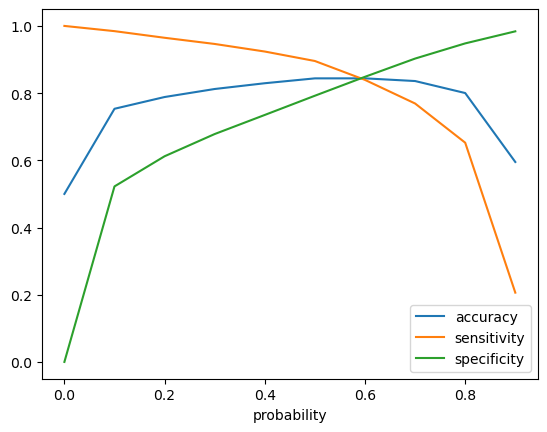

In [715]:
# Plotting accuracy, sensitivity, and specificity for various probabilities

cutoff_df.plot(x='probability', y=['accuracy', 'sensitivity', 'specificity']) 
plt.show()

Analysis of the curve above:

- Accuracy: The accuracy becomes stable at approximately a 0.6 probability cutoff. Before this point, it fluctuates, but as the probability threshold increases, the accuracy stabilizes, indicating that the model's performance does not improve significantly beyond this point.

- Sensitivity: Sensitivity tends to decrease as the probability cutoff increases. This is expected because, with a higher cutoff, fewer positive cases are predicted, leading to a higher number of false negatives. Consequently, sensitivity decreases as the threshold increases.

- Specificity: On the other hand, specificity increases as the probability cutoff rises. As fewer positive cases are predicted, the number of true negatives (correctly predicted non-churn cases) increases, which boosts specificity.

- Based on this analysis, the optimal cutoff point appears to be around 0.6, as it balances the trade-offs between accuracy, sensitivity, and specificity, providing a stable and meaningful prediction threshold.

In [719]:
# Creating a column named "predicted" with values based on the 0.6 cutoff

y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].apply(lambda x: 1 if x > 0.6 else 0) 
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,2.677917e-01,0,1,1,1,0,0,0,0,0,0,0,0
1,0,7.066182e-02,1,1,0,0,0,0,0,0,0,0,0,0
2,0,8.005556e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0,3.480948e-03,3,1,0,0,0,0,0,0,0,0,0,0
4,0,4.771784e-19,4,1,0,0,0,0,0,0,0,0,0,0


#### Evaluation Metrics

In [722]:
# Confusion Matrix Calculation 

confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[18181  3244]
 [ 3442 17983]]


In [726]:
TP = confusion[1,1] # True positive
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [730]:
# Accuracy
print("Accuracy:-",(metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted'])))

# Sensitivity
print("Sensitivity:-",(TP / float(TP+FN)))

# Specificity
print("Specificity:-",( TN / float(TN+FP)))

# Recall
print("Recall:-" , (TP/float(TP+FN)))

Accuracy:- 0.8439673278879813
Sensitivity:- 0.8393465577596266
Specificity:- 0.8485880980163361
Recall:- 0.8393465577596266


The model has yielded the following performance metrics on the training set:

- Accuracy: 0.844
- Sensitivity: 0.839
- Specificity: 0.849
- Recall: 0.839

From these results, we can observe that the model performs well overall. The accuracy of 84.4% indicates that the model is making correct predictions for a majority of the cases. Both sensitivity and recall are 83.9%, meaning that the model is able to correctly identify 83.9% of the actual churn cases, minimizing false negatives. Additionally, specificity is high at 84.9%, indicating that the model is effectively identifying non-churn cases with minimal false positives.

Overall, the model demonstrates balanced and robust performance on the training dataset, effectively capturing both churn and non-churn instances. This suggests that it is well-calibrated for these predictions and could generalize well on unseen data, but further evaluation on a test set is recommended to confirm its ability to perform in real-world scenarios.

In [738]:
# ROC curve.

# ROC Curve function

def PLOT_ROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

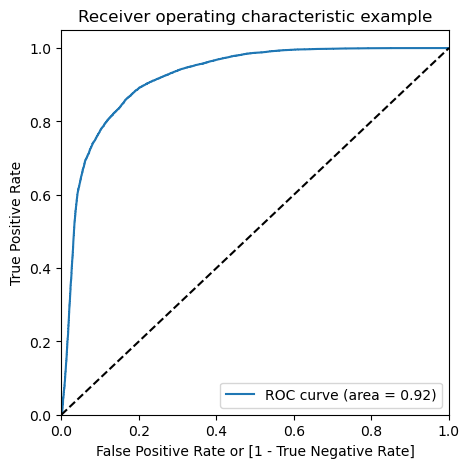

In [740]:
PLOT_ROC(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])


As observed from the curve, the model achieves an AUC value of 0.92, which is considered excellent. This indicates that the model has a strong ability to distinguish between churn and non-churn cases. An AUC of 0.92 suggests that the model performs well, correctly ranking positive and negative cases with high confidence. A value close to 1.0 reflects a high-quality predictive model, making it a promising tool for making accurate predictions in future use cases.

#### Analyzing Model Performance on the test Set

In [744]:
#Creating a copy of the test set
X_test_log = X_test.copy()

#Selecting only the columns that were used in the training set after eliminating insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

#Adding the constant term to the test set
X_test_sm = sm.add_constant(X_test_log)

In [748]:
#Making predictions on the test set using the FINAL MODEL (MODEL-IV)
y_test_pred = log_no_pca_4.predict(X_test_sm)

y_test_pred.head()

5704     0.033983
64892    0.000577
39613    0.513132
93118    0.020421
81235    0.034001
dtype: float64

In [750]:
# Converting y_test_pred into a DataFrame
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
5704,0.033983
64892,0.000577
39613,0.513132
93118,0.020421
81235,0.034001


In [752]:
# Converting y_test into a DataFrame
y_test_df = pd.DataFrame(y_test)

y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [754]:
# Adding Customer ID as the index
y_test_df['CustID'] = y_test_df.index

In [758]:
# Resetting the index in both dataframes to prepare for merging them
y_pred_1.reset_index(drop=True, inplace=True) 
y_test_df.reset_index(drop=True, inplace=True)

In [760]:
# Concatenating y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.033983
1,0,64892,0.000577
2,0,39613,0.513132
3,0,93118,0.020421
4,0,81235,0.034001


In [762]:
#Renaming the '0' column to 'churn_probability'
y_test_pred_final = y_test_pred_final.rename(columns={0: 'churn_prob'})

y_test_pred_final.head()

,churn,CustID,churn_prob
0,0,5704,0.033983
1,0,64892,0.000577
2,0,39613,0.513132
3,0,93118,0.020421
4,0,81235,0.034001


In [764]:
#Applying the optimal probability cutoff of 0.6 to the test set, as previously determined
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].apply(lambda x: 1 if x > 0.6 else 0)

y_test_pred_final.head()

,churn,CustID,churn_prob,test_predicted
0,0,5704,0.033983,0
1,0,64892,0.000577,0
2,0,39613,0.513132,0
3,0,93118,0.020421,0
4,0,81235,0.034001,0


##### EVALUATION METRICS 

In [769]:
# Confusion Matrix Calculation 

confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4497  851]
 [  44  149]]


In [773]:
#Accuracy
print("Accuracy: ", round(metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']), 2))

#Sensitivity
print("Sensitivity: ", round(TP / float(TP + FN), 2))

#Specificity
print("Specificity: ", round(TN / float(TN + FP), 2))

#Recall
print("Recall: ", round(TP / float(TP + FN), 2))

Accuracy:  0.84
Sensitivity:  0.84
Specificity:  0.85
Recall:  0.84


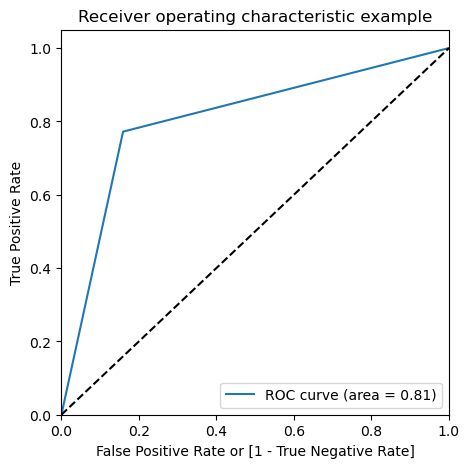

In [777]:
PLOT_ROC(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])

#### As we can see we from the above ROC plot we get AUC of 0.81.

Model Summary (Logistic Regression Without PCA)

Train Set:

- Accuracy: 0.844
- Sensitivity: 0.839
- Specificity: 0.849
- Recall: 0.839

Test Set:

- Accuracy:  0.84
- Sensitivity:  0.84
- Specificity:  0.85
- Recall:  0.84

In [795]:
model_stats = pd.DataFrame({
    'Model': ['Logistic Regression with PCA', 'Decision Tree with PCA', 'Random Forest with PCA', 'Logistic without PCA'],
    'Recall': [0.90, 0.92, 0.87, 0.84],
    'Test Accuracy': [0.84, 0.85, 0.87, 0.84],
    'ROC AUC Score': [0.90, 0.76, 0.88, 0.81],
})

model_stats.sort_values(by=['Recall', 'Test Accuracy', 'ROC AUC Score'], ascending=False)

,Model,Recall,Test Accuracy,ROC AUC Score
1,Decision Tree with PCA,0.92,0.85,0.76
0,Logistic Regression with PCA,0.90,0.84,0.90
2,Random Forest with PCA,0.87,0.87,0.88
3,Logistic without PCA,0.84,0.84,0.81


In [797]:
features = dt_pca_model.feature_importances_
columns =[X.iloc[:,sorted(range(len(features)), key=lambda i: features[i])[-10:]].columns]

columns

[Index(['roam_ic_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'arpu_7',
        'onnet_mou_6', 'onnet_mou_7', 'arpu_8', 'std_og_t2o_mou',
        'roam_og_mou_8', 'loc_og_t2o_mou'],
       dtype='object')]

In [807]:
Imp_Features=pd.DataFrame({'FEATURES':['roam_ic_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'arpu_7',
        'onnet_mou_6', 'onnet_mou_7', 'arpu_8', 'std_og_t2o_mou',
        'roam_og_mou_8', 'loc_og_t2o_mou']})
Imp_Features

,FEATURES
0,roam_ic_mou_8
1,loc_og_t2m_mou_8
2,loc_og_t2f_mou_8
3,arpu_7
4,onnet_mou_6
5,onnet_mou_7
6,arpu_8
7,std_og_t2o_mou
8,roam_og_mou_8
9,loc_og_t2o_mou


EDA reveals that churn rates are higher among customers who show the following behaviours in the action phase compared to the good phase:
* Reduced Usage: Lower minutes of usage (MOU).
* Lower Recharge Activity: Decrease in recharge amount and frequency.
* Higher Volume-Based Costs: Increase in volume-based costs, indicating fewer monthly recharges.
In particular, customers with MOU between 0–2500 are more likely to churn, with higher usage correlating to lower churn rates. This trend suggests that decreased engagement and higher costs contribute to customer churn.

The following features being particularly influential:
* Roaming and Outgoing Calls: Roaming incoming minutes (roam_ic_mou_8) and outgoing (roam_og_mou_8), as well as local outgoing to mobile (loc_og_t2m_mou_8), to fixed lines (loc_og_t2f_mou_8), and to other operators (loc_og_t2o_mou).
* On-network and Revenue Metrics: On-network minutes in earlier months (onnet_mou_6, onnet_mou_7) and average revenue per user (ARPU) for the 7th and 8th months (arpu_7, arpu_8).
This data suggests that reduced activity across roaming, outgoing calls, and revenue in the Action Phase is linked to customer churn patterns.

These features provide valuable insights into customer engagement and spending behavior, especially during the Action Phase, and may be indicative of trends leading to customer churn:
* Roaming Minutes: The variables for roaming incoming (roam_ic_mou_8) and outgoing (roam_og_mou_8) minutes reveal how often customers use their services while outside their home network area. A decline here could suggest reduced reliance on services during travel, possibly due to alternative options or limited needs, both of which might contribute to churn.
* Local Outgoing Calls: The features capturing local outgoing minutes to mobile (loc_og_t2m_mou_8), fixed lines (loc_og_t2f_mou_8), and other operators (loc_og_t2o_mou) track engagement with different local call types. A reduction in these metrics during the Action Phase might imply that customers are making fewer calls or relying less on the network, which can signal a drift toward decreased overall usage.
* On-network Usage: On-network minutes (onnet_mou_6 and onnet_mou_7) represent calls within the same network, typically more cost-effective. A drop in these minutes over time could indicate a decline in engagement with the network's ecosystem, potentially making these customers more prone to switching or reducing their activity.
* Average Revenue Per User (ARPU): ARPU values for the 7th and 8th months (arpu_7 and arpu_8) provide insight into how much revenue each customer is generating. A decrease in ARPU often correlates with reduced engagement in high-revenue activities like calls or data usage, making it a critical churn indicator as lower-revenue customers are more likely to stop recharging or using the service altogether.
* STD Outgoing Minutes: The feature for standard outgoing (STD) calls to other networks (std_og_t2o_mou) reflects engagement beyond local calls, often indicating higher spending customers. A reduction here might imply a shift away from longer-distance calls, which can impact overall revenue and suggest that customers are engaging less deeply with the service.
Altogether, these metrics serve as indicators of decreased engagement, spending, and overall reliance on the network during the Action Phase. The decline across these key areas signals potential churn risks.



To reduce churn based on the observed decline in recharge, call usage, and data usage during the Action Phase, here are targeted strategies aligned with the identified features:

1. Increase Engagement with Roaming and Long-Distance Offers
Personalized Roaming Discounts: Offer targeted discounts or bundle packages for customers who previously had high roaming usage (roam_ic_mou_8, roam_og_mou_8) but show a decrease in the Action Phase. These discounts could be activated automatically when they travel, making it convenient and affordable to stay engaged.
Promote STD and International Packages: Encourage usage of long-distance services by promoting special rates for outgoing standard calls to other networks (std_og_t2o_mou). This may appeal to customers who might otherwise turn to alternative communication methods.
2. Boost Local Call Engagement
Local Call Incentives: For customers whose local outgoing minutes (loc_og_t2m_mou_8, loc_og_t2f_mou_8, loc_og_t2o_mou) have declined, offer free or discounted minutes for calls within the network or to fixed lines. Creating special offers around these call types can increase usage among customers who may be seeking cost-effective local call options.
Unlimited On-network Calls: For customers with declining on-network minutes (onnet_mou_6, onnet_mou_7), introduce affordable or unlimited calling plans for on-network calls. This can drive network loyalty and encourage them to continue using on-network services.
3. Revitalize ARPU Through Targeted Upselling
ARPU-based Upselling: For customers with declining average revenue per user (arpu_7, arpu_8), use predictive analytics to target them with plans that match their previous spending levels. For instance, offer bundled recharge plans that include data, call minutes, and roaming benefits at a price point similar to their historical ARPU, enticing them to maintain or slightly increase their spend.
Discounted Recharge Promotions: Provide periodic discounts on recharges or offer additional perks (like bonus minutes or data) for maintaining a certain recharge frequency. These can appeal to customers at risk of churn due to declining spending.
4. Promote Data and Digital Engagement
Free Data Allowances on Recharges: For customers with reduced data usage in the Action Phase, encourage recharges by offering free data bonuses or premium app access (e.g., streaming services or popular apps) upon recharging. This approach can stimulate digital engagement, tying the value of data services directly to their usage.
Reward High Data Usage: Implement a reward program that gives loyal customers free minutes or data if they hit certain usage thresholds. This can help maintain engagement and prevent churn by incentivizing active usage.
5. Encourage Consistent Recharge Behavior
Auto-recharge Subscriptions: For customers showing reduced recharge behavior, offer a convenient auto-recharge option. Auto-recharge can reduce the friction of manual recharging and is particularly effective for retaining customers who may be considering stopping their service.
Loyalty Points for Regular Recharges: Implement a loyalty points system where customers earn points for each recharge, which they can redeem for discounts, additional talk time, or data. This can promote consistent recharges among users with declining patterns and boost overall retention.
6. Use Customer Segmentation and Predictive Alerts
Segment-Based Campaigns: Use segmentation to create tailored campaigns based on churn-risk indicators, such as those showing declines in roaming, ARPU, and specific call types. Predictive analytics can identify high-risk segments for immediate intervention, where personalized messages or exclusive offers can be used to boost engagement.
Churn-Prevention Alerts: Send friendly reminders or alerts to customers who haven’t used certain services recently, offering a quick call-to-action like “Don’t Miss Out on Our Latest Offers” with links to packages that address their specific usage history.
By aligning these strategies with observed customer behaviors, telecom providers can proactively engage customers, encourage consistent usage, and improve retention through relevant and timely offers.